<a href="https://colab.research.google.com/github/0xlari/Projeto-3/blob/main/Profissao_Cientista_de_Dados_M13_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [21]:
df = pd.read_csv("/content/MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO (1).csv.csv", delimiter=',')

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [24]:
#Seu código aqui para a média
media_por_categoria = df.groupby('Categoria')['Preco_Normal'].mean()

In [26]:
#Seu código aqui para a mediana
mediana_por_categoria = df.groupby('Categoria')['Preco_Normal'].median()

Digite aqui as categorias:

In [27]:
print("Média por Categoria:")
print(media_por_categoria)
print("\nMediana por Categoria:")
print(mediana_por_categoria)

Média por Categoria:
Categoria
belleza-y-cuidado-personal    1783.556485
comidas-preparadas            3095.043478
congelados                    2108.042553
frutas                        1724.473684
instantaneos-y-sopas           765.491228
lacteos                       2385.219239
verduras                      1343.296875
Name: Preco_Normal, dtype: float64

Mediana por Categoria:
Categoria
belleza-y-cuidado-personal    1569.0
comidas-preparadas            3290.0
congelados                    1519.0
frutas                        1195.0
instantaneos-y-sopas           439.0
lacteos                        989.0
verduras                      1180.0
Name: Preco_Normal, dtype: float64


In [28]:
comparacao = media_por_categoria > mediana_por_categoria
print("Onde a média é maior que a mediana:")
print(comparacao[comparacao == True].index)

print("Onde a média é menor ou igual à mediana:")
print(comparacao[comparacao == False].index)

Onde a média é maior que a mediana:
Index(['belleza-y-cuidado-personal', 'congelados', 'frutas',
       'instantaneos-y-sopas', 'lacteos', 'verduras'],
      dtype='object', name='Categoria')
Onde a média é menor ou igual à mediana:
Index(['comidas-preparadas'], dtype='object', name='Categoria')


# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [31]:
#Seu código aqui
desvio_padrao_por_categoria = df.groupby('Categoria')['Preco_Normal'].std()

Digite nesse campo o comportamento que você identificou.

In [30]:
print("\nDesvio padrão por Categoria:")
print(desvio_padrao_por_categoria)


Desvio padrão por Categoria:
Categoria
belleza-y-cuidado-personal    2210.041719
comidas-preparadas            2019.911428
congelados                    2111.539896
frutas                        1639.151114
instantaneos-y-sopas          1170.232869
lacteos                       3925.816164
verduras                      1012.699625
Name: Preco_Normal, dtype: float64


# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

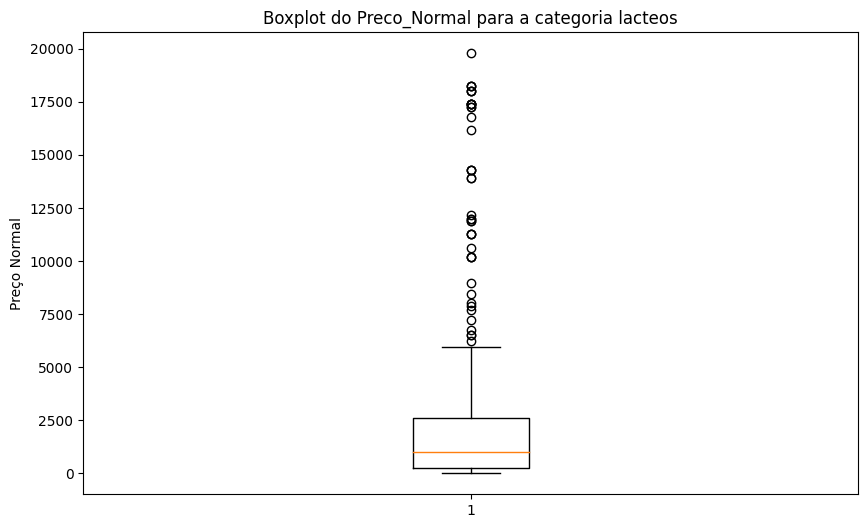

In [32]:
#Seu código aqui
categoria_maior_desvio = desvio_padrao_por_categoria.idxmax()
plt.figure(figsize=(10, 6))
df_categoria_maior_desvio = df.loc[df['Categoria'] == categoria_maior_desvio]
plt.boxplot(df_categoria_maior_desvio['Preco_Normal'])
plt.title(f"Boxplot do Preco_Normal para a categoria {categoria_maior_desvio}")
plt.ylabel('Preço Normal')
plt.show()



# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

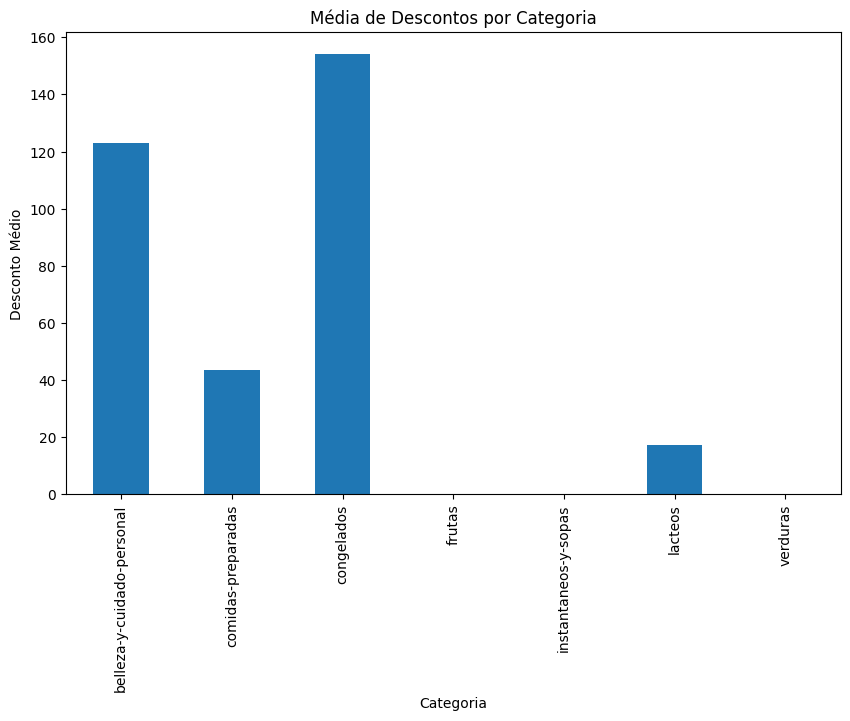

In [33]:
# Seu código aqui
media_desconto_por_categoria = df.groupby('Categoria')['Desconto'].mean()

media_desconto_por_categoria.plot(kind='bar', figsize=(10, 6))
plt.title('Média de Descontos por Categoria')
plt.ylabel('Desconto Médio')
plt.show()


# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [34]:
# Seu código aqui
grafico = px.scatter(df, x='Marca', y='Categoria', size='Desconto', color='Desconto',
                     hover_name='title', size_max=60, title='Média de Descontos por Categoria e Marca')

grafico.show()
